In [1]:
### Data from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
### Credit Card Fraud Prediction/Detection

###  This program first creates a smaller dataset by using all 492 Type 1 and randomly choosing 492 Type 0
###  to create more balanced data, with 1/2 1's and 1/2 0's

import pandas as pd
import numpy as np

In [2]:
dataX=pd.read_csv('creditcard.csv',header=0)
dataX=dataX.dropna() # Remove missing values or NA
print(dataX.shape)
print(list(dataX.columns))

(284807, 31)
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Type']


In [3]:
dataX
###  dataset provides the credit card users' information. It includes 284,807 records/cases and 31 fields.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Type
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data=dataX.groupby("Type").sample(n=492, random_state=1)
### creates 492 or n number of each of Type 1 and 0

In [5]:
print(data)

            Time         V1        V2         V3         V4        V5  \
106066   69808.0   0.136174 -1.647766   0.850033   1.576178 -1.569057   
102005   68015.0  -0.911610  0.680815   1.344329  -0.068517  0.596394   
278450  168231.0  -0.917299  0.860942   1.201170  -0.962314 -0.372495   
120218   75751.0   1.252596  0.021359   0.044063   0.325909  0.011174   
258527  158694.0  -1.109483  1.061341   1.484072   0.923891 -0.137718   
...          ...        ...       ...        ...        ...       ...   
240222  150494.0   1.852889  1.069593  -1.776101   4.617410  0.770413   
11710    20011.0 -14.724627  7.875157 -21.872317  11.906170 -8.348734   
42756    41233.0 -10.645800  5.918307 -11.671043   8.807369 -7.975501   
263274  160870.0  -0.644278  5.002352  -8.252739   7.756915 -0.216267   
223578  143438.0  -5.256434  0.364541  -5.412085   2.400031  0.697301   

              V6         V7        V8        V9  ...       V21       V22  \
106066 -0.106752   0.026632 -0.091738  0.517553

In [6]:
count_fraud = len(data[data['Type']==1])
count_nofraud = len(data[data['Type']==0])
pct_of_fraud = count_fraud/(count_fraud+count_nofraud)
print("percentage of fraud cases is", pct_of_fraud*100)

percentage of fraud cases is 50.0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Type
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,90203.307927,-2.364619,1.743232,-3.506993,2.280260,-1.575253,-0.668521,-2.750780,0.312665,-1.333917,...,0.349367,-0.008846,-0.024103,-0.059573,0.015420,0.034122,0.088549,0.051257,115.683831,0.500000
std,48251.478276,5.528330,3.735836,6.231580,3.215631,4.209624,1.752510,5.868525,4.849720,2.284843,...,2.779431,1.180442,1.168454,0.563083,0.676084,0.473694,0.995770,0.418853,269.217465,0.500254
min,153.000000,-30.552380,-12.040133,-31.103685,-3.566075,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.223230,-7.263482,-1.986332,0.000000,0.000000
25%,48807.500000,-2.788129,-0.229387,-5.120349,-0.134686,-1.810494,-1.599839,-3.066415,-0.205095,-2.292523,...,-0.170345,-0.565998,-0.229350,-0.405859,-0.336073,-0.281821,-0.073177,-0.059602,1.520000,0.000000
50%,84204.000000,-0.776242,0.860827,-1.397989,1.356204,-0.474459,-0.617714,-0.608199,0.158318,-0.783593,...,0.157435,0.000873,-0.020774,-0.004961,0.056850,-0.009377,0.049262,0.035679,18.960000,0.500000
75%,135904.750000,1.013305,2.777569,0.371142,4.305361,0.479624,0.133037,0.288291,0.856881,0.157760,...,0.654740,0.565665,0.196361,0.365721,0.391606,0.354507,0.457194,0.225032,100.000000,1.000000
max,172751.000000,2.342858,22.057729,3.277221,12.114672,11.095089,6.474115,6.108224,20.007208,6.325787,...,27.202839,8.361985,5.466230,1.253697,2.208209,2.745261,3.052358,2.292313,2793.600000,1.000000


In [8]:
### Explore features mean of fraud cases vs. nofraud cases.
data.groupby('Type').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Type,,,,,,,,,,,,,,,,,,,,,
0,99659.808943,0.042711,-0.137314,0.019294,0.018491,0.000718,0.060694,0.067172,0.054694,-0.086712,...,0.052759,-0.014854,-0.031741,-0.007898,-0.014016,-0.010610,0.016595,0.006523,0.026847,109.156341
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Observations: The feature V# means of the fraud type 1 and nofraud type 0 are quite different.

In [9]:
data1=data.iloc[:,1:30]
data1
# Did not include last col Type as this target need not be standardized

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
106066,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,-0.332990,...,1.031270,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00
102005,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,-0.551040,...,-0.299226,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89
278450,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,-0.737621,...,-0.073391,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99
120218,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,-0.097356,...,-0.106821,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80
258527,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,-0.521974,...,-0.013126,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240222,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,-0.217705,-0.373927,...,-0.288392,-0.157869,-0.176244,0.027437,-0.468006,0.058063,0.148263,0.042278,0.040573,1.00
11710,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,-13.261652,...,0.996469,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00
42756,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00
263274,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,...,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77


In [10]:
# Normalization of all features
from sklearn.preprocessing import StandardScaler #from sklearn import preprocessing done earlier
scaler = StandardScaler().fit(data1)  # this computes means and sd to standardize
data2 = scaler.transform(data1)       # this does the standardization with computed means, sds
data3=pd.DataFrame(data2,index=data1.index,columns=data1.columns)             
# above step converts array from last step back to pandas dataframe, also puts back indexes V's

In [11]:
data3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
106066,0.452590,-0.908156,0.699540,-0.219068,0.001473,0.320715,0.473513,-0.083429,0.810739,0.547278,...,0.759841,0.084694,0.501098,-0.449049,0.917369,0.276578,-0.735957,-0.107277,0.207349,1.576911
102005,0.262963,-0.284530,0.778902,-0.730796,0.516139,-0.342721,0.600116,-0.092331,0.475578,0.499288,...,-0.474955,-0.075617,0.221830,-0.175108,0.746262,0.041380,-1.315130,-0.115269,0.259429,-0.404317
278450,0.261934,-0.236290,0.755917,-1.008891,0.285862,0.316093,0.469270,0.079884,0.566468,0.458225,...,-0.265364,-0.175664,-0.410804,0.021949,-0.552302,-0.603565,0.572126,0.089290,0.152588,-0.355633
120218,0.654638,-0.461142,0.570138,-0.608075,0.377049,0.351060,0.452429,-0.061773,0.699390,0.599138,...,-0.296390,-0.160374,-0.218345,-0.040359,-1.226776,0.553629,0.971427,-0.118905,-0.116624,-0.363771
258527,0.227152,-0.182620,0.801338,-0.422019,0.341661,0.847880,0.471403,0.129071,0.529009,0.505686,...,-0.209434,-0.298529,-1.153363,0.002984,1.133433,0.465104,-1.815785,0.121465,0.041891,-0.338946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240222,0.763278,-0.180410,0.277903,0.727179,0.557499,0.152808,0.461988,-0.046037,0.488777,0.538269,...,-0.464900,-0.182589,-0.141881,0.044132,-0.725721,0.063106,0.241083,-0.046491,-0.025521,-0.426206
11710,-2.236895,1.642214,-2.948636,2.994997,-1.609865,-0.910201,-2.230427,-0.048438,-2.199481,-2.298140,...,0.727543,-0.976132,0.939451,0.908758,-1.735594,-0.399852,1.284649,2.082443,-3.469658,-0.426206
42756,-1.498715,1.118143,-1.310775,2.030839,-1.521158,-1.666050,-1.852517,1.261643,-2.642458,-2.215940,...,-0.240101,0.800068,0.182783,-1.407444,1.098073,-0.064104,0.676164,0.185659,-0.487686,-0.429923
263274,0.311345,0.872838,-0.761951,1.704001,0.322993,-1.189171,-0.103669,0.225613,-1.344291,-0.687986,...,0.560572,0.085802,-0.505926,0.049534,-1.237742,-0.034912,1.053219,0.578159,0.336350,-0.427061


In [12]:
data3.describe()
# note the standardization of all features to mean 0 sd 1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,...,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02
mean,5.776770e-17,2.888385e-17,-1.155354e-16,-5.776770e-17,-5.776770e-17,2.888385e-17,-2.888385e-17,1.083144e-17,-5.776770e-17,-5.776770e-17,...,-1.444193e-17,-1.444193e-17,-1.444193e-17,9.026203e-19,7.220963e-18,2.527337e-17,7.220963e-18,2.166289e-17,3.610481e-18,3.068909e-17
std,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,...,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00
min,-5.101377e+00,-3.691376e+00,-4.430774e+00,-1.819023e+00,-4.879466e+00,-3.275681e+00,-6.956981e+00,-8.532031e+00,-5.298526e+00,-4.790970e+00,...,-4.523029e+00,-8.332188e+00,-7.524883e+00,-1.646620e+01,-3.497625e+00,-7.098916e+00,-2.655702e+00,-7.387015e+00,-4.867158e+00,-4.299225e-01
25%,-7.664615e-02,-5.282948e-01,-2.590316e-01,-7.513840e-01,-5.591009e-02,-5.316896e-01,-5.381186e-02,-1.068150e-01,-4.197633e-01,-3.856781e-01,...,-3.954106e-01,-1.870803e-01,-4.722262e-01,-1.757465e-01,-6.152955e-01,-5.201591e-01,-6.673143e-01,-1.624957e-01,-2.648066e-01,-4.242737e-01
50%,2.874620e-01,-2.363204e-01,3.386103e-01,-2.875101e-01,2.616276e-01,2.900566e-02,3.652827e-01,-3.184206e-02,2.409810e-01,4.342560e-01,...,-1.775257e-01,-6.908944e-02,8.237504e-03,2.850044e-03,9.703750e-02,6.131159e-02,-9.187481e-02,-3.947402e-02,-3.721064e-02,-3.594604e-01
75%,6.113314e-01,2.770098e-01,6.226522e-01,6.300878e-01,4.883861e-01,4.576099e-01,5.181228e-01,1.122730e-01,6.531895e-01,6.355340e-01,...,2.664944e-01,1.099247e-01,4.869387e-01,1.887762e-01,7.556790e-01,5.567028e-01,6.766994e-01,3.703999e-01,4.150941e-01,-5.828673e-02
max,8.519517e-01,5.440504e+00,1.089236e+00,3.059870e+00,3.011382e+00,4.077734e+00,1.510347e+00,4.063030e+00,3.354103e+00,3.089493e+00,...,1.006630e+01,9.666413e+00,7.094876e+00,4.701190e+00,2.333473e+00,3.245017e+00,5.726305e+00,2.977912e+00,5.353177e+00,9.952096e+00


In [13]:
data4=pd.concat([data3, data["Type"]], axis=1) 
# argument incl axis=1 so it concats by columns
# puts back the 1,0 Type column
data4

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Type
106066,0.452590,-0.908156,0.699540,-0.219068,0.001473,0.320715,0.473513,-0.083429,0.810739,0.547278,...,0.084694,0.501098,-0.449049,0.917369,0.276578,-0.735957,-0.107277,0.207349,1.576911,0
102005,0.262963,-0.284530,0.778902,-0.730796,0.516139,-0.342721,0.600116,-0.092331,0.475578,0.499288,...,-0.075617,0.221830,-0.175108,0.746262,0.041380,-1.315130,-0.115269,0.259429,-0.404317,0
278450,0.261934,-0.236290,0.755917,-1.008891,0.285862,0.316093,0.469270,0.079884,0.566468,0.458225,...,-0.175664,-0.410804,0.021949,-0.552302,-0.603565,0.572126,0.089290,0.152588,-0.355633,0
120218,0.654638,-0.461142,0.570138,-0.608075,0.377049,0.351060,0.452429,-0.061773,0.699390,0.599138,...,-0.160374,-0.218345,-0.040359,-1.226776,0.553629,0.971427,-0.118905,-0.116624,-0.363771,0
258527,0.227152,-0.182620,0.801338,-0.422019,0.341661,0.847880,0.471403,0.129071,0.529009,0.505686,...,-0.298529,-1.153363,0.002984,1.133433,0.465104,-1.815785,0.121465,0.041891,-0.338946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240222,0.763278,-0.180410,0.277903,0.727179,0.557499,0.152808,0.461988,-0.046037,0.488777,0.538269,...,-0.182589,-0.141881,0.044132,-0.725721,0.063106,0.241083,-0.046491,-0.025521,-0.426206,1
11710,-2.236895,1.642214,-2.948636,2.994997,-1.609865,-0.910201,-2.230427,-0.048438,-2.199481,-2.298140,...,-0.976132,0.939451,0.908758,-1.735594,-0.399852,1.284649,2.082443,-3.469658,-0.426206,1
42756,-1.498715,1.118143,-1.310775,2.030839,-1.521158,-1.666050,-1.852517,1.261643,-2.642458,-2.215940,...,0.800068,0.182783,-1.407444,1.098073,-0.064104,0.676164,0.185659,-0.487686,-0.429923,1
263274,0.311345,0.872838,-0.761951,1.704001,0.322993,-1.189171,-0.103669,0.225613,-1.344291,-0.687986,...,0.085802,-0.505926,0.049534,-1.237742,-0.034912,1.053219,0.578159,0.336350,-0.427061,1


In [14]:
### Splitting the data into 80% training set and 20% test set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split the data into training and test sets
X = data4.drop("Type", axis=1) ## except "Type" col, rest are features
y = data4["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# note there are 0.2 x 984 = 197 test cases

# Naive Bayes Algorithm

In [15]:
# Train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the model
y_pred_NB = gnb.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_NB = metrics.accuracy_score(y_test, y_pred_NB)
print("Naive Bayes Accuracy:",Accuracy_NB)

Naive Bayes Accuracy: 0.9238578680203046


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_NB)
print(confusion_matrix)

[[95  2]
 [13 87]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        97
           1       0.98      0.87      0.92       100

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_NB = gnb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_NB)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the 197 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_NB = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_NB

0.9705154639175257

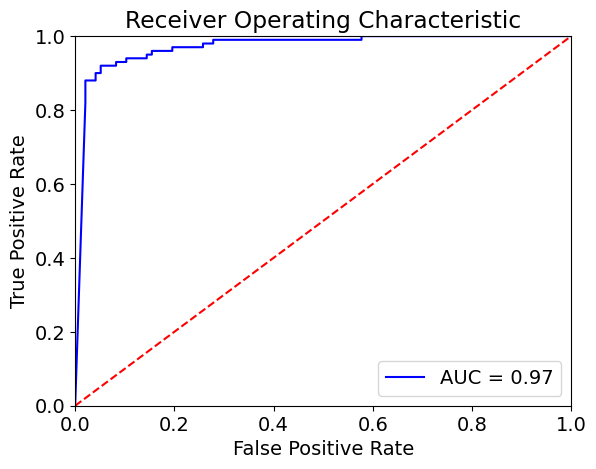

In [19]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_NB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# k-Nearest Neighbor Algorithm

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kNN= KNeighborsClassifier(n_neighbors = 3, algorithm='auto', metric='minkowski', p=2,
     metric_params=None, n_jobs=None, weights='uniform')
# argument: Minkowski (default metric) and p=2 gives Euclidean distance
# default weight is uniform
# algorithm auto uses 'best' search method to solve min distances
# n_jobs (default none means 1): number of parallel processes to solve
kNN.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_kNN = kNN.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN = metrics.accuracy_score(y_test, y_pred_kNN)
print(Accuracy_kNN)

0.9238578680203046


In [23]:
print('Test set score: {:.16f}'.format(kNN.score(X_test, y_test))) 
## same computation as combined two steps above

Test set score: 0.9238578680203046


In [24]:
# Compare with training score
print('Training set score: {:.16f}'.format(kNN.score(X_train, y_train)))

Training set score: 0.9580686149936467


In [25]:
# Notice that both training fitting accuracy score .9504 and testing accuracy score .9289
# are close so there is no overfitting in the training

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN)
print(confusion_matrix)
print('inline with accuracy of KNN = (95+87) /(95+87+2+13), result below i verify with Chatgpt also')
print('95 = TN')
print('87 = TP')
print('13 = FN')
print('2 = FP')

[[95  2]
 [13 87]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        97
           1       0.98      0.87      0.92       100

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [28]:
kNN.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.

In [29]:
Prob1=kNN.predict_proba(X_test)[:,0]  
### gives the probabilities for target variable being 0

In [30]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(Prob1)
# The output contains 0. , 0.333, 0.666, 1. That is,
# the 3-NN neighborhood could have 0.0 Type1, 1 x Type 1 (1/3)
# 2 x Type 1 (2/3) and 3 x Type 1 (1.0)

[0.         0.66666667 1.         1.         0.         0.66666667
 1.         1.         0.         0.         0.         1.
 0.66666667 0.33333333 0.         0.66666667 0.33333333 1.
 1.         0.         1.         1.         0.66666667 0.66666667
 1.         0.         1.         0.         0.33333333 1.
 0.         0.         0.33333333 0.         1.         0.
 0.         0.66666667 1.         0.         1.         0.
 1.         0.66666667 0.         0.         1.         1.
 0.66666667 1.         0.         0.         1.         0.66666667
 1.         1.         0.         0.66666667 1.         0.
 0.33333333 0.         1.         0.         0.         0.
 1.         0.66666667 0.33333333 0.         0.         0.66666667
 1.         0.33333333 0.         0.         0.         1.
 0.33333333 1.         0.         0.         0.66666667 0.66666667
 1.         0.         1.         0.66666667 0.66666667 1.
 0.         0.         1.         0.         0.66666667 1.
 0.         0.  

In [31]:
Prob2=kNN.predict_proba(X_test)[:,1] #gives the probabilities for target variable being 1
print(Prob2)

[1.         0.33333333 0.         0.         1.         0.33333333
 0.         0.         1.         1.         1.         0.
 0.33333333 0.66666667 1.         0.33333333 0.66666667 0.
 0.         1.         0.         0.         0.33333333 0.33333333
 0.         1.         0.         1.         0.66666667 0.
 1.         1.         0.66666667 1.         0.         1.
 1.         0.33333333 0.         1.         0.         1.
 0.         0.33333333 1.         1.         0.         0.
 0.33333333 0.         1.         1.         0.         0.33333333
 0.         0.         1.         0.33333333 0.         1.
 0.66666667 1.         0.         1.         1.         1.
 0.         0.33333333 0.66666667 1.         1.         0.33333333
 0.         0.66666667 1.         1.         1.         0.
 0.66666667 0.         1.         1.         0.33333333 0.33333333
 0.         1.         0.         0.33333333 0.33333333 0.
 1.         1.         0.         1.         0.33333333 0.
 1.         1.  

In [32]:
len(Prob1), len(Prob2)

(197, 197)

In [33]:
Prob3=np.add(Prob1,Prob2) # element by element sum of arrays Prob 1 and Prob2
print(np.sum(Prob3)) # numpy provides this np.sum to add all elements in array
# results show that 

197.0


In [34]:
Prob3

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, Prob2)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 197 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN
### But note that for k-NN, prob is % of points = 1 in neighborhood

0.9590721649484535

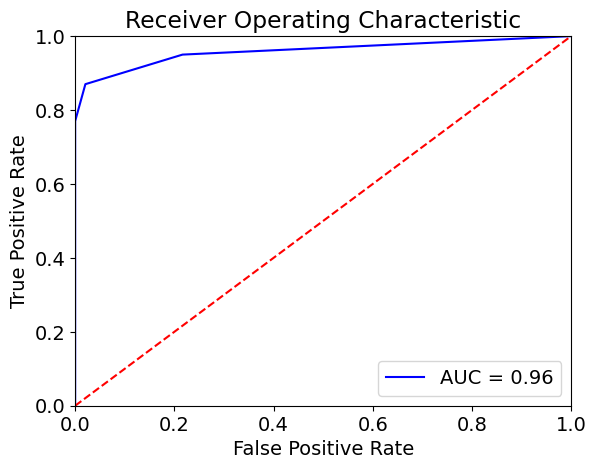

In [36]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Next try k=5

In [37]:
from sklearn.neighbors import KNeighborsClassifier
kNN5= KNeighborsClassifier(n_neighbors = 5, algorithm='auto', metric='minkowski', p=2)
kNN5.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier()

In [38]:
y_pred_kNN5 = kNN5.predict(X_test)

In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN5 = metrics.accuracy_score(y_test, y_pred_kNN5)
print(Accuracy_kNN5)

0.9086294416243654


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN5)
print(confusion_matrix)

[[94  3]
 [15 85]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN5))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        97
           1       0.97      0.85      0.90       100

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [42]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, kNN5.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 197 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN5 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN5

0.9574226804123711

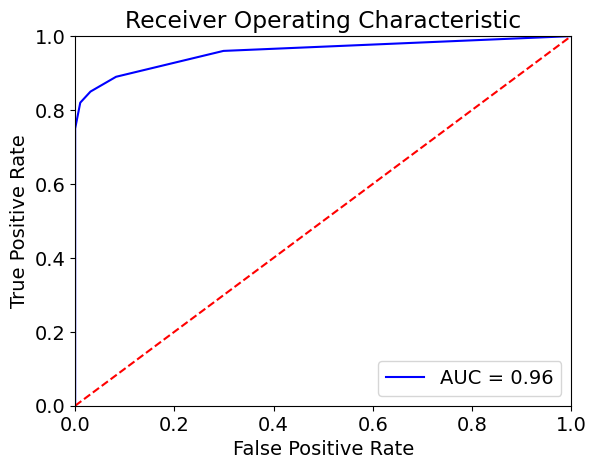

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# try larger neighborhoods

# Next try k=7

In [44]:
from sklearn.neighbors import KNeighborsClassifier
kNN7= KNeighborsClassifier(n_neighbors = 7, algorithm='auto', metric='minkowski', p=2)
kNN7.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier(n_neighbors=7)

In [45]:
y_pred_kNN7 = kNN7.predict(X_test)

In [46]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN7 = metrics.accuracy_score(y_test, y_pred_kNN7)
print(Accuracy_kNN7)

0.8984771573604061


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN7)
print(confusion_matrix)

[[93  4]
 [16 84]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN7))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        97
           1       0.95      0.84      0.89       100

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



In [49]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, kNN7.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 197 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN7 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN7

0.9584020618556702

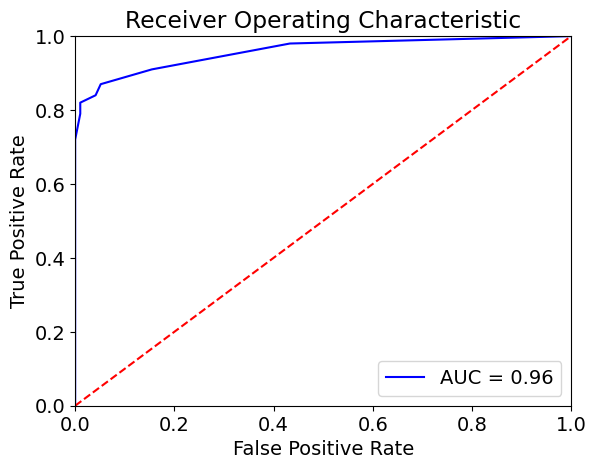

In [50]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Next try k=15

In [51]:
from sklearn.neighbors import KNeighborsClassifier
kNN15= KNeighborsClassifier(n_neighbors = 15, algorithm='auto', metric='minkowski', p=2)
kNN15.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier(n_neighbors=15)

In [52]:
y_pred_kNN15 = kNN15.predict(X_test)

In [53]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN15 = metrics.accuracy_score(y_test, y_pred_kNN15)
print(Accuracy_kNN15)

0.9035532994923858


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN15)
print(confusion_matrix)

[[96  1]
 [18 82]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN15))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        97
           1       0.99      0.82      0.90       100

    accuracy                           0.90       197
   macro avg       0.92      0.90      0.90       197
weighted avg       0.92      0.90      0.90       197



In [56]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, kNN15.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 197 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN15 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN15

0.9668041237113402

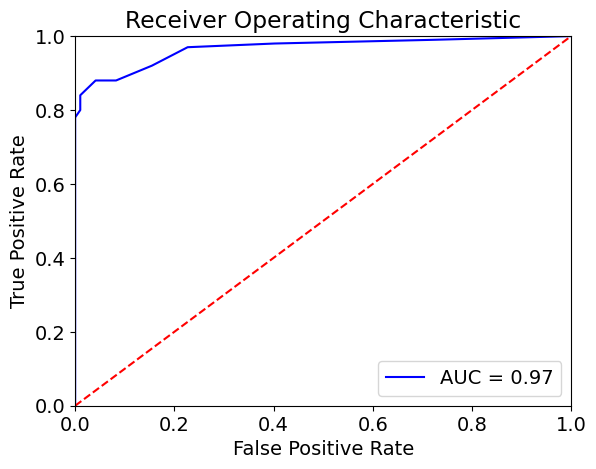

In [57]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN15)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machines

Linear Kernel

In [58]:
from sklearn import svm
svm1 = svm.SVC(kernel='linear', C = 1.0, probability=True) 
### C is regularization para. Default C=1.
svm1.fit(X_train,y_train)
y_pred_svm = svm1.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[94,  3],
       [ 8, 92]])

In [60]:
accuracy_score(y_test,y_pred_svm)

0.9441624365482234

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        97
           1       0.97      0.92      0.94       100

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [62]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm1=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm1.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm1.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 197 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm

0.9679381443298968

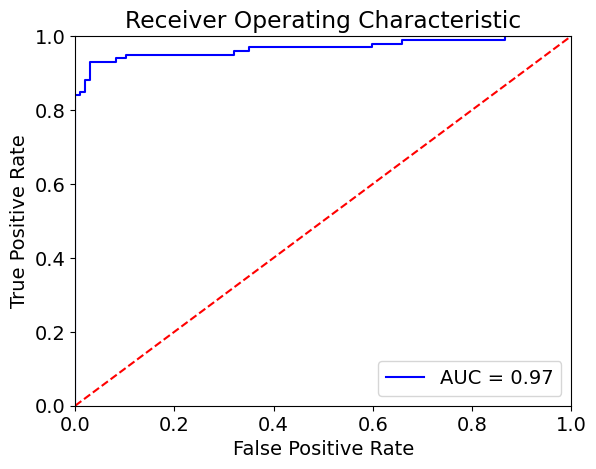

In [63]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Polynomial Kernel

In [64]:
from sklearn import svm
svm2 = svm.SVC(kernel='poly', C = 1.0, probability=True) # C is regularization para. Default C=1.
svm2.fit(X_train,y_train)
y_pred_svm2 = svm2.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm2)

array([[97,  0],
       [18, 82]])

In [66]:
accuracy_score(y_test,y_pred_svm2)

0.9086294416243654

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        97
           1       1.00      0.82      0.90       100

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [68]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm2=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm2.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm2.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm2 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm2

0.9709278350515463

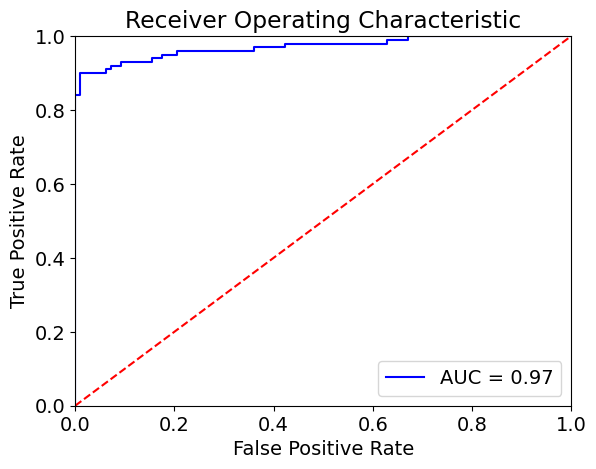

In [69]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Sigmoid Kernel

In [70]:
from sklearn import svm
svm3 = svm.SVC(kernel='sigmoid', C = 1.0, probability=True) # C is regularization para. Default C=1.
svm3.fit(X_train,y_train)
y_pred_svm3 = svm3.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm3)

array([[95,  2],
       [15, 85]])

In [72]:
accuracy_score(y_test,y_pred_svm3)

0.9137055837563451

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm3))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        97
           1       0.98      0.85      0.91       100

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [74]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm3=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm3.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm3.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm3 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm3

0.9377319587628865

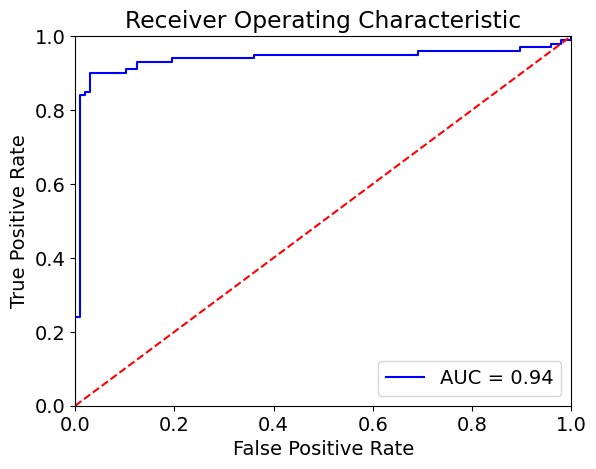

In [75]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

rbf or Gaussian Kernel

In [76]:
from sklearn import svm
svm4 = svm.SVC(kernel='rbf', C = 1.0, gamma='scale', probability=True) # C is regularization para. Default C=1.
svm4.fit(X_train,y_train)
y_pred_svm4 = svm4.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm4)

array([[95,  2],
       [12, 88]])

In [78]:
accuracy_score(y_test,y_pred_svm4)

0.9289340101522843

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm4))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        97
           1       0.98      0.88      0.93       100

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [80]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm4=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm4.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm4.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm4 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm4

0.9849484536082473

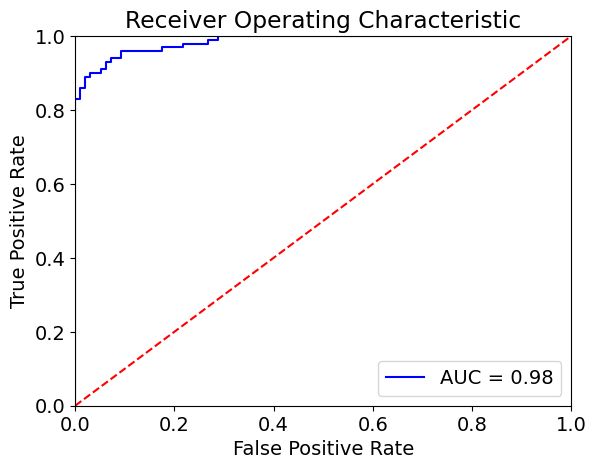

In [81]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Compare with Logistic Regression

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1, 
                        multi_class='multinomial',
                        solver='newton-cg')
LR = LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.9441624365482234


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix)

[[94  3]
 [ 8 92]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        97
           1       0.97      0.92      0.94       100

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [85]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_LR = LR.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_LR)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_LR = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_LR

0.9713402061855669

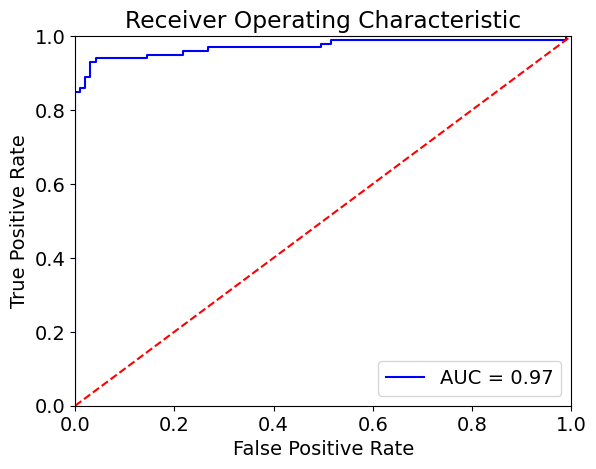

In [86]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()